# ANÁLISE EXPLORATÓRIA E VISUALIZAÇÃO DOS DADOS DE SIMULAÇÃO

In [ ]:
pip show pandas-profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# CARREGANDO DADOS DE SIMULAÇÃO EM DATAFRAME
df = pd.read_csv('dados_simulacao2.csv')

In [3]:
# VISUALIZAÇÃO INICIAL DA DISPOSIÇÃO DOS DADOS
df.head(10)

,Nome,LOA (m),Boca (m),DWT (ton),Calado de Entrada (m),Calado de Saída (m),Calado Aéreo (m),Pontal (m),Tamanho de Lança (m),Ano de Construção,Tipo do Navio,Último Porto,Próximo Porto,Situação
0,Navio1,59,15,63260,14,8,24,19,11,2008,GL,Porto5,Porto2,1
1,Navio2,15,9,46723,13,15,30,13,60,2015,GL,Porto1,Porto5,1
2,Navio3,18,11,191817,15,16,28,10,33,2009,GS,Porto3,Porto1,0
3,Navio4,18,13,195241,11,16,19,12,74,2020,GSM,Porto2,Porto5,0
4,Navio5,54,17,37299,10,15,16,14,24,2006,GLP,Porto5,Porto3,1
5,Navio6,24,15,161956,16,12,14,18,101,2019,GL,Porto1,Porto5,0
6,Navio7,34,17,69892,9,18,21,8,87,2002,GL,Porto2,Porto4,0
7,Navio8,36,6,34081,11,14,27,10,47,2000,GSM,Porto5,Porto2,0
8,Navio9,51,17,30851,16,17,10,16,62,2015,GL,Porto4,Porto5,1
9,Navio10,38,13,114217,19,14,21,15,108,2002,GSM,Porto3,Porto5,0


In [7]:
# DESCRIÇÃO GERAL DOS DADOS
df.describe()

,LOA (m),Boca (m),DWT (ton),Calado de Entrada (m),Calado de Saída (m),Calado Aéreo (m),Pontal (m),Tamanho de Lança (m),Ano de Construção,Situação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,36.611000,11.425000,113554.570000,13.536000,13.567000,21.698000,12.153000,63.278000,2009.929000,0.408000
std,12.956371,3.527722,50034.347423,3.408272,3.459694,7.342118,4.443798,31.249564,7.156478,0.491709
min,15.000000,6.000000,30043.000000,8.000000,8.000000,10.000000,5.000000,10.000000,1998.000000,0.000000
25%,25.000000,8.000000,69858.750000,11.000000,11.000000,15.000000,8.000000,37.000000,2003.750000,0.000000
50%,37.000000,11.000000,109808.500000,14.000000,14.000000,22.000000,12.000000,61.500000,2010.000000,0.000000
75%,48.000000,14.000000,158915.250000,16.000000,17.000000,28.000000,16.000000,90.000000,2016.000000,1.000000
max,59.000000,17.000000,199967.000000,19.000000,19.000000,34.000000,19.000000,119.000000,2022.000000,1.000000


In [8]:
# VERIFICANDO VALORES ÚNICOS:
df.nunique()

Nome                     1000
LOA (m)                    45
Boca (m)                   12
DWT (ton)                 996
Calado de Entrada (m)      12
Calado de Saída (m)        12
Calado Aéreo (m)           25
Pontal (m)                 15
Tamanho de Lança (m)      110
Ano de Construção          25
Tipo do Navio               6
Último Porto                5
Próximo Porto               5
Situação                    2
dtype: int64

In [9]:
# VERIFICANDO BALANCEAMENTO ENTRE CLASSES
df['Situação'].value_counts()

Situação
0    592
1    408
Name: count, dtype: int64

<module 'matplotlib' from 'C:\\Users\\dpf\\anaconda3\\Lib\\site-packages\\matplotlib\\__init__.py'>

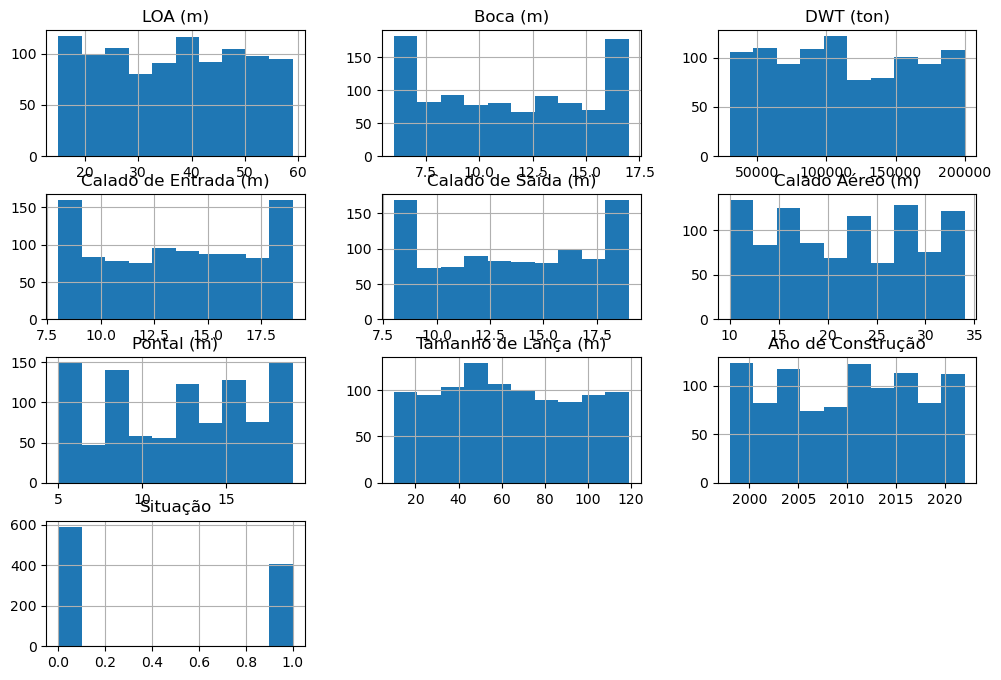

In [11]:
# VISUALIZAÇÃO GERAL DE HISTOGRAMAS
df.hist(figsize=(12,8))
plt

<Axes: >

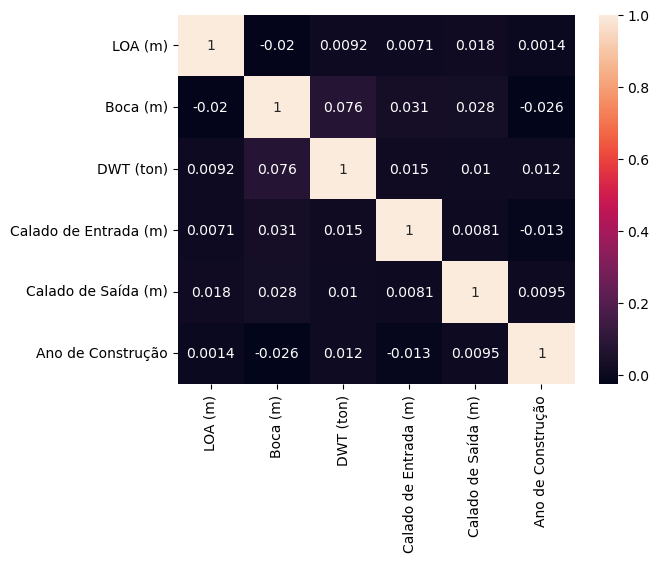

In [13]:
# MATRIZ DE CORRELAÇÃO
indice_uteis = [1, 2, 3, 4, 5, 9]
elementos_correlacao = df.iloc[:, indice_uteis]
matriz_correlacao = elementos_correlacao.corr()
sns.heatmap(matriz_correlacao, annot=True)


In [16]:
# IDENTIFICAND OUTLIERS
from scipy import stats
z_scores = np.abs(stats.zscore(elementos_correlacao))
outliers = np.where(z_scores > 3)
outliers

(array([], dtype=int64), array([], dtype=int64))